In [2]:
## dorsal views random select 200
## 140+60
import os
import random
random.seed(51)
import shutil

base_path = "../ALICE_lateral_dorsal/ALICE_dorsal_mask/val/"

images_names = os.listdir(base_path + "images/")
random.shuffle(images_names)
selected_names = images_names[:60]
selected_labels = [x.replace("jpeg", "txt") for x in selected_names]

dest_path = "../ALICE_hybrid/dorsal/"
for i in range(len(selected_names)):
    shutil.copy(base_path + "images/" + selected_names[i], dest_path + "images/" + selected_names[i])
    shutil.copy(base_path + "labels/" + selected_labels[i], dest_path + "labels/" + selected_labels[i])

In [5]:
## resize x4 views
from PIL import Image
import os
from tqdm import tqdm
target_path = "../ALICE_labelval/selected_hy_oo/"
save_path = "../ALICE_labelval/selected_hy_oo_resized/"

images = os.listdir(target_path)
for image in tqdm(images, desc="resizing images"):
    with Image.open(target_path+image) as img:
        aspect_ratio = img.height / img.width
        new_width = 640
        new_height = int(new_width * aspect_ratio)
        resized_img = img.resize((new_width, new_height), Image.LANCZOS)
        resized_img.save(save_path+image)

resizing images: 100%|███████████████████████████████████████████████████████████████| 131/131 [00:32<00:00,  4.08it/s]


In [27]:
## create train, validation, test set for each dataset, 7:1.5:1.5
import os
import shutil
import random
from tqdm import tqdm

random.seed(51)
ratio = [0.7,0.15,0.15]

base_path = "./x4/"

# create dirs
target_dir = ["train", "val", "test"]
for target in target_dir:
    os.makedirs(base_path + target + "/images/", exist_ok=True)
    os.makedirs(base_path + target + "/labels/", exist_ok=True)

# shuffle dataset and split
images_name = os.listdir(base_path + "images/")

images_count = len(images_name)
train_split, val_split = int(images_count*ratio[0]), int(images_count*(ratio[0]+ratio[1]))
images_dict = {}

random.shuffle(images_name)
images_dict[target_dir[0]], images_dict[target_dir[1]], images_dict[target_dir[2]] = \
    images_name[:train_split], images_name[train_split:val_split], images_name[val_split:]

# copy images
for target in target_dir:
    for im in tqdm(images_dict[target], desc=f"Creating {target} set"):
        shutil.copy(base_path + "images/" + im, base_path + f"{target}/images/" + im)
        lb = im.replace(im.split(".")[-1], "txt")
        shutil.copy(base_path + "labels/" + lb, base_path + f"{target}/labels/" + lb)

Creating test set: 100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 82.72it/s]


In [21]:
import random
random.seed(51)

images_name = os.listdir(base_path + "images/")

images_count = len(images_name)
train_split, val_split = int(images_count*ratio[0]), int(images_count*(ratio[0]+ratio[1]))
images_dict = {}

random.shuffle(images_name)
images_dict[target_dir[0]], images_dict[target_dir[1]], images_dict[target_dir[2]] = \
    images_name[:train_split], images_name[train_split:val_split], images_name[val_split:]

In [23]:
a = "asdfawef.asdfe.jpeg"
a.replace(a.split(".")[-1], "txt")

'asdfawef.asdfe.txt'

In [53]:
from ultralytics import YOLO
import shutil
import os

model = YOLO("../trains/mask_hybrid_mosaic9_v8m_x640/weights/best.pt")
model

TypeError: 'YOLO' object is not subscriptable

## eval and test

In [2]:
from ultralytics import YOLO
import shutil
import os

model = YOLO("../trains/mask_hybrid_mosaic9_v8m_x640/weights/best.pt")

a = model.val(data="../ALICE_hybrid/hybrid/ALICE_hybrid.yaml", imgsz=640, batch=8, name = "val_hybrid", classes=[1,2,3], split="val", workers=2)
a = model.val(data="../ALICE_hybrid/hybrid/ALICE_hybrid.yaml", imgsz=640, batch=8, name = "test_hybrid", classes=[1,2,3], split="test", workers=2)

a = model.val(data="../ALICE_hybrid/dorsal/ALICE_hybrid.yaml", imgsz=640, batch=8, name = "val_dorsal", classes=[1,2,3], split="val", workers=2)
a = model.val(data="../ALICE_hybrid/dorsal/ALICE_hybrid.yaml", imgsz=640, batch=8, name = "test_dorsal", classes=[1,2,3], split="test", workers=2)

a = model.val(data="../ALICE_hybrid/lateral/ALICE_hybrid.yaml", imgsz=640, batch=8, name = "val_lateral", classes=[1,2,3], split="val", workers=2)
a = model.val(data="../ALICE_hybrid/lateral/ALICE_hybrid.yaml", imgsz=640, batch=8, name = "test_lateral", classes=[1,2,3], split="test", workers=2)

a = model.val(data="../ALICE_hybrid/x4/ALICE_hybrid.yaml", imgsz=640, batch=8, name = "val_x4", classes=[1,2,3], split="val", workers=2)
a = model.val(data="../ALICE_hybrid/x4/ALICE_hybrid.yaml", imgsz=640, batch=8, name = "test_x4", classes=[1,2,3], split="test", workers=2)

Ultralytics YOLOv8.2.26  Python-3.8.19 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv8m-seg summary (fused): 245 layers, 27225279 parameters, 0 gradients, 110.0 GFLOPs


val: Scanning C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\hybrid\val\labels.cache... 90 images, 0 backgrounds
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all         90        420      0.951      0.945      0.957      0.824      0.935      0.929      0.948      0.698
                 label         90        239      0.882      0.858      0.886      0.792      0.912      0.887      0.917      0.744
              specimen         90         91      0.984      0.989      0.993      0.929      0.984      0.989      0.993      0.863
                   pin         90         90      0.988      0.989      0.992      0.752       0.91      0.911      0.935      0.487
Speed: 0.6ms preprocess, 18.5ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_insect_CV\models\ultralytics\runs\segment\val_hybrid
Ultralytics YOLOv8.2.26  Python-3.8.19 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)


val: Scanning C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\hybrid\test\labels.cache... 90 images, 0 background
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all         90        445      0.949      0.943      0.967      0.827      0.936       0.93      0.952      0.707
                 label         90        264      0.913      0.869      0.926      0.816      0.928      0.885       0.93       0.75
              specimen         90         91      0.978      0.983      0.992      0.913      0.989      0.994      0.995       0.87
                   pin         90         90      0.956      0.978      0.984      0.753       0.89      0.911      0.931      0.502
Speed: 0.4ms preprocess, 18.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_insect_CV\models\ultralytics\runs\segment\test_hybrid
Ultralytics YOLOv8.2.26  Python-3.8.19 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)


val: Scanning C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\dorsal\val\labels.cache... 30 images, 0 backgrounds
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all         30        140       0.92      0.897      0.916      0.804      0.963      0.895      0.928      0.726
                 label         30         80      0.793      0.725      0.774      0.658      0.913      0.786      0.833      0.652
              specimen         30         30      0.968          1      0.995      0.902      0.993          1      0.995      0.861
                   pin         30         30      0.998      0.967      0.979      0.854      0.984        0.9      0.957      0.664
Speed: 2.4ms preprocess, 30.8ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_insect_CV\models\ultralytics\runs\segment\val_dorsal
Ultralytics YOLOv8.2.26  Python-3.8.19 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)


val: Scanning C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\dorsal\test\labels.cache... 30 images, 0 background
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all         30        142      0.942      0.886      0.931      0.819      0.984      0.926      0.958      0.737
                 label         30         81      0.861      0.753      0.836      0.712      0.954       0.84      0.898      0.706
              specimen         30         31      0.967      0.938      0.978      0.912          1      0.972      0.995      0.891
                   pin         30         30      0.999      0.967      0.979      0.834      0.997      0.967      0.979      0.614
Speed: 0.8ms preprocess, 23.7ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_insect_CV\models\ultralytics\runs\segment\test_dorsal
Ultralytics YOLOv8.2.26  Python-3.8.19 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)


val: Scanning C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\lateral\val\labels.cache... 30 images, 0 background
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all         30        137      0.971      0.986      0.988       0.83      0.967      0.982      0.987      0.669
                 label         30         77      0.961      0.961      0.975      0.855      0.948      0.948      0.972      0.724
              specimen         30         30      0.985          1      0.995      0.954      0.985          1      0.995      0.844
                   pin         30         30      0.968      0.997      0.994      0.681      0.968      0.997      0.994      0.438
Speed: 0.9ms preprocess, 14.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_insect_CV\models\ultralytics\runs\segment\val_lateral
Ultralytics YOLOv8.2.26  Python-3.8.19 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)


val: Scanning C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\lateral\test\labels.cache... 30 images, 0 backgroun
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all         30        146      0.955      0.966      0.981      0.843      0.951      0.965      0.975        0.7
                 label         30         86      0.941       0.93       0.97      0.881      0.901      0.895      0.936      0.735
              specimen         30         30      0.987          1      0.995      0.909      0.986          1      0.995      0.853
                   pin         30         30      0.935      0.967      0.977      0.739      0.968          1      0.993      0.512
Speed: 0.7ms preprocess, 16.2ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_insect_CV\models\ultralytics\runs\segment\test_lateral
Ultralytics YOLOv8.2.26  Python-3.8.19 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)


val: Scanning C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\x4\val\labels.cache... 30 images, 0 backgrounds, 0 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all         30        143       0.97       0.94      0.971      0.834        0.9      0.898      0.922      0.684
                 label         30         82      0.917      0.854      0.936       0.88      0.924      0.927      0.968       0.85
              specimen         30         31      0.992      0.968      0.981       0.94      0.984      0.968      0.981      0.888
                   pin         30         30      0.999          1      0.995      0.683      0.791        0.8      0.818      0.314
Speed: 1.5ms preprocess, 26.9ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_insect_CV\models\ultralytics\runs\segment\val_x4
Ultralytics YOLOv8.2.26  Python-3.8.19 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)


val: Scanning C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\x4\test\labels.cache... 30 images, 0 backgrounds, 0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all         30        157      0.967      0.963      0.983      0.808      0.892      0.885      0.898      0.663
                 label         30         97      0.977      0.889      0.964      0.869      0.977       0.89      0.954      0.813
              specimen         30         30      0.964          1      0.994      0.914      0.964          1      0.995      0.864
                   pin         30         30       0.96          1      0.992       0.64      0.735      0.767      0.746      0.313
Speed: 0.8ms preprocess, 24.7ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_insect_CV\models\ultralytics\runs\segment\test_x4


In [1]:
from ultralytics import YOLO
import shutil
import os

model = YOLO(r"C:\Users\Frank\Downloads\best_ex.pt")

a = model.val(data="../ALICE_hybrid/hybrid/ALICE_hybrid.yaml", imgsz=640, batch=8, name = "val_hybrid", classes=[1,2,3], split="val", workers=2)
a = model.val(data="../ALICE_hybrid/hybrid/ALICE_hybrid.yaml", imgsz=640, batch=8, name = "test_hybrid", classes=[1,2,3], split="test", workers=2)

Ultralytics YOLOv8.2.26  Python-3.8.19 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv8m-seg summary (fused): 245 layers, 27225279 parameters, 0 gradients, 110.0 GFLOPs


val: Scanning C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\hybrid\val\labels.cache... 90 images, 0 backgrounds
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all         90        420       0.97       0.94      0.967      0.823      0.952      0.926      0.958      0.698
                 label         90        239       0.91      0.849      0.917      0.813      0.924       0.87      0.943      0.739
              specimen         90         91          1      0.985      0.993      0.921          1      0.985      0.993      0.878
                   pin         90         90          1      0.986      0.992      0.735      0.933      0.922      0.937      0.476
Speed: 0.5ms preprocess, 17.7ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_insect_CV\models\ultralytics\runs\segment\val_hybrid6
Ultralytics YOLOv8.2.26  Python-3.8.19 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)


val: Scanning C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\hybrid\test\labels.cache... 90 images, 0 background
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all         90        445      0.951      0.946      0.963      0.813      0.937      0.932       0.95      0.697
                 label         90        264      0.898      0.871      0.917      0.807      0.913      0.886      0.929      0.734
              specimen         90         91      0.985      0.989      0.993      0.908      0.996          1      0.995      0.863
                   pin         90         90       0.97      0.978      0.978      0.723      0.902      0.911      0.926      0.493
Speed: 0.4ms preprocess, 15.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_insect_CV\models\ultralytics\runs\segment\test_hybrid2


In [2]:
from ultralytics import YOLO
import shutil
import os

model = YOLO(r"C:\Users\Frank\Downloads\best_ex.pt")
a = model.val(data="../ALICE_hybrid/scan/ALICE_hybrid.yaml", imgsz=640, batch=8, name = "test_scan_ex", classes=[2], split="val", workers=2)

Ultralytics YOLOv8.2.26  Python-3.8.19 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv8m-seg summary (fused): 245 layers, 27225279 parameters, 0 gradients, 110.0 GFLOPs


val: Scanning C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\scan\val\labels.cache... 86 images, 1 backgrounds, 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all         87        495      0.957      0.982      0.993      0.989      0.957      0.982      0.993      0.982
              specimen         86        495      0.957      0.982      0.993      0.989      0.957      0.982      0.993      0.982
Speed: 0.3ms preprocess, 12.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_insect_CV\models\ultralytics\runs\segment\test_scan_ex2


In [3]:
from ultralytics import YOLO
import os

# model = YOLO(r"C:\Users\Frank\Downloads\best_ex.pt")
model = YOLO("../trains/mask_hybrid_mosaic9_v8m_x640/weights/best.pt")
base_dir = "../ALICE_hybrid/scan/val/images/"
val_imgs = os.listdir(base_dir)
val_imgs_path = [(base_dir + x) for x in val_imgs]
results = model.predict(val_imgs_path, save=True, imgsz=640, nms=False, iou=0.3, classes= [2,3], stream=True, workers=2)
for i in results:
    continue


0: 640x640 1 specimen, 130.3ms
1: 640x640 2 specimens, 130.3ms
2: 640x640 3 specimens, 130.3ms
3: 640x640 3 specimens, 130.3ms
4: 640x640 4 specimens, 130.3ms
5: 640x640 4 specimens, 130.3ms
6: 640x640 1 specimen, 130.3ms
7: 640x640 1 specimen, 130.3ms
8: 640x640 1 specimen, 130.3ms
9: 640x640 (no detections), 130.3ms
10: 640x640 3 specimens, 130.3ms
11: 640x640 4 specimens, 130.3ms
12: 640x640 6 specimens, 1 pin, 130.3ms
13: 640x640 7 specimens, 130.3ms
14: 640x640 5 specimens, 130.3ms
15: 640x640 2 specimens, 130.3ms
16: 640x640 2 specimens, 130.3ms
17: 640x640 3 specimens, 130.3ms
18: 640x640 5 specimens, 2 pins, 130.3ms
19: 640x640 5 specimens, 130.3ms
20: 640x640 3 specimens, 130.3ms
21: 640x640 2 specimens, 130.3ms
22: 640x640 1 specimen, 130.3ms
23: 640x640 1 specimen, 130.3ms
24: 640x640 3 specimens, 130.3ms
25: 640x640 3 specimens, 130.3ms
26: 640x640 3 specimens, 130.3ms
27: 640x640 4 specimens, 130.3ms
28: 640x640 3 specimens, 130.3ms
29: 640x640 2 specimens, 130.3ms
30: 64

In [24]:
from ultralytics import YOLO
import os

model = YOLO(r"C:\Users\Frank\Downloads\best_ex.pt")
# model = YOLO("../trains/mask_hybrid_mosaic9_v8m_x640/weights/best.pt")
video_dir = "../ALICE_videos/test_pins/"
for video_path in [(video_dir + x) for x in os.listdir(video_dir)]:
    results = model.predict(video_path, save=False, imgsz=640, nms=False, iou=0.3, classes = [3], stream=True, workers=2)
    pin_count = 0
    flag = False
    for i in results:
        if i.masks:
            pin_count += 1
        else:
            pin_count = 0
        if pin_count >= 30:
            flag=True
            break
        continue
    if flag:
        pin_result = i
        result_show(pin_result, "../ALICE_videos/test_pins_result/{}.png".format(pin_result.path.split("\\")[-1].split(".")[-2]))
    else:
        print("FAIL!!!!\n")


video 1/1 (frame 1/450) C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\..\ALICE_videos\test_pins\20240807_170210.mp4: 640x384 1 pin, 22.9ms
video 1/1 (frame 2/450) C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\..\ALICE_videos\test_pins\20240807_170210.mp4: 640x384 (no detections), 22.1ms
video 1/1 (frame 3/450) C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\..\ALICE_videos\test_pins\20240807_170210.mp4: 640x384 (no detections), 22.2ms
video 1/1 (frame 4/450) C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\..\ALICE_videos\test_pins\20240807_170210.mp4: 640x384 (no detections), 22.1ms
video 1/1 (frame 5/450) C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\..\ALICE_videos\test_pins\20240807_170210.mp4: 640x384 (no detections), 22.0ms
video 1/1 (frame 6/450) C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\..\ALICE_videos\test_pins\20240807_170210.mp4: 640x384 (no detections), 19.6ms
video 1/1 (frame 7/450) C:\Users\Frank\Desktop\ucl\EDS\0034final\AL

In [3]:
from ultralytics import YOLO
import os

model = YOLO(r"C:\Users\Frank\Downloads\best_h.pt")
# model = YOLO("../trains/mask_hybrid_mosaic9_v8m_x640/weights/best.pt")
video_dir = "../ALICE_videos/test_pins/"
for video_path in [(video_dir + x) for x in os.listdir(video_dir)]:
    results = model.predict(video_path, save=True, imgsz=640, nms=False, iou=0.3, classes = [3], name = "test_scan_h_{}".format(video_path[-10:-4]), stream=True, workers=2)
    for i in results:
        continue


video 1/1 (frame 1/450) C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\..\ALICE_videos\test_pins\20240807_170210.mp4: 640x384 (no detections), 80.8ms
video 1/1 (frame 2/450) C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\..\ALICE_videos\test_pins\20240807_170210.mp4: 640x384 (no detections), 26.1ms
video 1/1 (frame 3/450) C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\..\ALICE_videos\test_pins\20240807_170210.mp4: 640x384 (no detections), 25.7ms
video 1/1 (frame 4/450) C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\..\ALICE_videos\test_pins\20240807_170210.mp4: 640x384 (no detections), 24.9ms
video 1/1 (frame 5/450) C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\..\ALICE_videos\test_pins\20240807_170210.mp4: 640x384 (no detections), 23.1ms
video 1/1 (frame 6/450) C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_hybrid\..\ALICE_videos\test_pins\20240807_170210.mp4: 640x384 (no detections), 25.2ms
video 1/1 (frame 7/450) C:\Users\Frank\Desktop\ucl\EDS\00

In [4]:
import os
import shutil

def move_files_to_parent_folder(parent_folder):
    # 遍历父文件夹中的所有子文件夹
    for root, dirs, files in os.walk(parent_folder):
        for dir_name in dirs:
            subdir_path = os.path.join(root, dir_name)
            # 遍历子文件夹中的所有文件
            for file_name in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file_name)
                if os.path.isfile(file_path):
                    # 将文件移动到父文件夹
                    shutil.move(file_path, parent_folder)
            # 删除空的子文件夹
            os.rmdir(subdir_path)

# 使用举例
parent_folder_path = r"C:\Users\Frank\Desktop\ucl\EDS\0034final\Pinned_Insect_CV\models\ultralytics\runs\segment\labels"  # 替换为你的父文件夹路径
move_files_to_parent_folder(parent_folder_path)


In [18]:
from copy import deepcopy
from functools import lru_cache
from pathlib import Path

import numpy as np
import torch
from tqdm import tqdm

from ultralytics.data.augment import LetterBox
from ultralytics.utils import LOGGER, SimpleClass, ops
from ultralytics.utils.plotting import Annotator, colors, save_one_box
from ultralytics.utils.torch_utils import smart_inference_mode

def result_show(result, save_dir):
    names = result.names
    is_obb = result.obb is not None
    pred_boxes, show_boxes = result.obb if is_obb else result.boxes, True
    pred_masks, show_masks = result.masks, True
    pred_probs, show_probs = result.probs, True

    
    line_width=None
    font_size=None
    font="Arial.ttf"
    pil=True
    labels=True
    
    annotator = Annotator(
        deepcopy(result.orig_img),
        line_width,
        font_size,
        font,
        pil or (result.probs),  # Classify tasks default to pil=True
        example=names,
    )
    im_gpu=None
    
    
    # Plot Segment results
    if pred_masks and show_masks:
        if im_gpu is None:
            img = LetterBox(pred_masks.shape[1:])(image=annotator.result())
            im_gpu = (
                torch.as_tensor(img, dtype=torch.float16, device=pred_masks.data.device)
                .permute(2, 0, 1)
                .flip(0)
                .contiguous()
                / 255
            )
        idx = range(len(pred_masks))
        annotator.masks(pred_masks.data, colors=[colors(x, True) for x in idx], im_gpu=im_gpu)
    
    # Plot Detect results
    if pred_boxes is not None and show_boxes:
        idx = 0
        for d in pred_boxes:
            c, conf, id = int(d.cls), float(d.conf), None if d.id is None else int(d.id.item())
            name = ("" if id is None else f"id:{id} ") + names[c]
            label = (f"{name} {conf:.2f}" if conf else name) if labels else None
            box = d.xyxyxyxy.reshape(-1, 4, 2).squeeze() if is_obb else d.xyxy.squeeze()
            annotator.box_label(box, label, color=colors(idx, True), rotated=is_obb)
            idx += 1
    
    # Show results
    # annotator.show(results_cpu[0].path)
    
    annotator.save(save_dir)

# plot training

In [1]:
import os
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter1d
results = pd.read_csv("C:\\Users\\Frank\\Downloads\\results.csv").fillna(0)

In [2]:
results.columns

Index(['                  epoch', '         train/box_loss',
       '         train/seg_loss', '         train/cls_loss',
       '         train/dfl_loss', '   metrics/precision(B)',
       '      metrics/recall(B)', '       metrics/mAP50(B)',
       '    metrics/mAP50-95(B)', '   metrics/precision(M)',
       '      metrics/recall(M)', '       metrics/mAP50(M)',
       '    metrics/mAP50-95(M)', '           val/box_loss',
       '           val/seg_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')

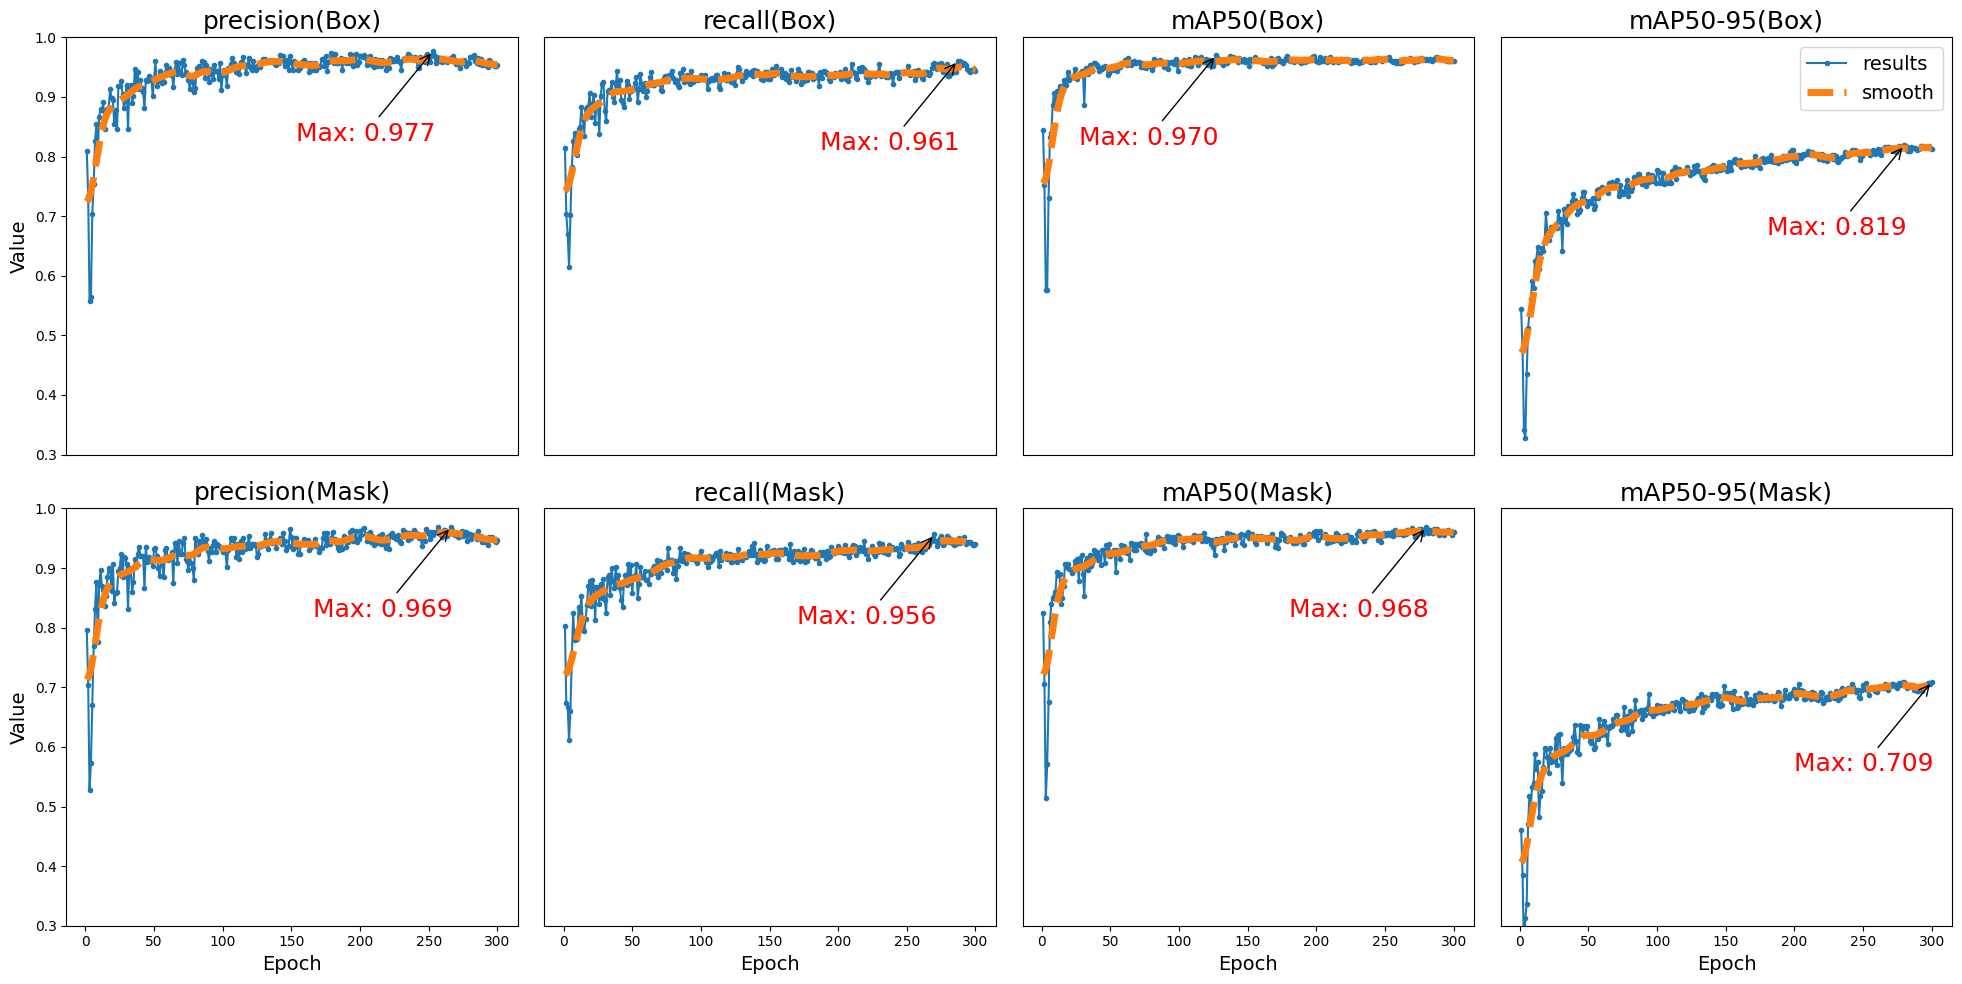

In [3]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

plt.rcParams.update({'font.size': 12})

for i in range(8):
    row = i // 4
    col = i % 4
    ax = axs[row, col]
    x, y = results.iloc[:, 0], results.iloc[:, i + 5]
    y_smooth = gaussian_filter1d(y, sigma=5)
    
    ax.plot(x, y, label="results", marker='o', markersize=3)
    ax.plot(x, y_smooth, label="smooth", linestyle='--', linewidth=5)
    title = results.columns[i + 5].strip().split("/")[-1].replace("B", "Box").replace("M", "Mask")
    ax.set_title(title, fontsize=18)


    max_value = y.max()
    max_index = y.idxmax()
    ax.annotate(f'Max: {max_value:.3f}', xy=(x[max_index], max_value), 
                xytext=(x[max_index] - 100, max_value - 0.15),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                fontsize=18, color='red')

    if row == 1:
        ax.set_xlabel('Epoch', fontsize=14)
    else:
        ax.set_xticks([])  # Remove x-ticks for other columns

    if col == 0:
        ax.set_ylabel('Value', fontsize=14)
    else:
        ax.set_yticks([])  # Remove x-ticks for other columns
    ax.set_ylim(0.3, 1)   

    if row == 0 and col == 3:
        ax.legend(fontsize=14) 


plt.tight_layout()
plt.show()


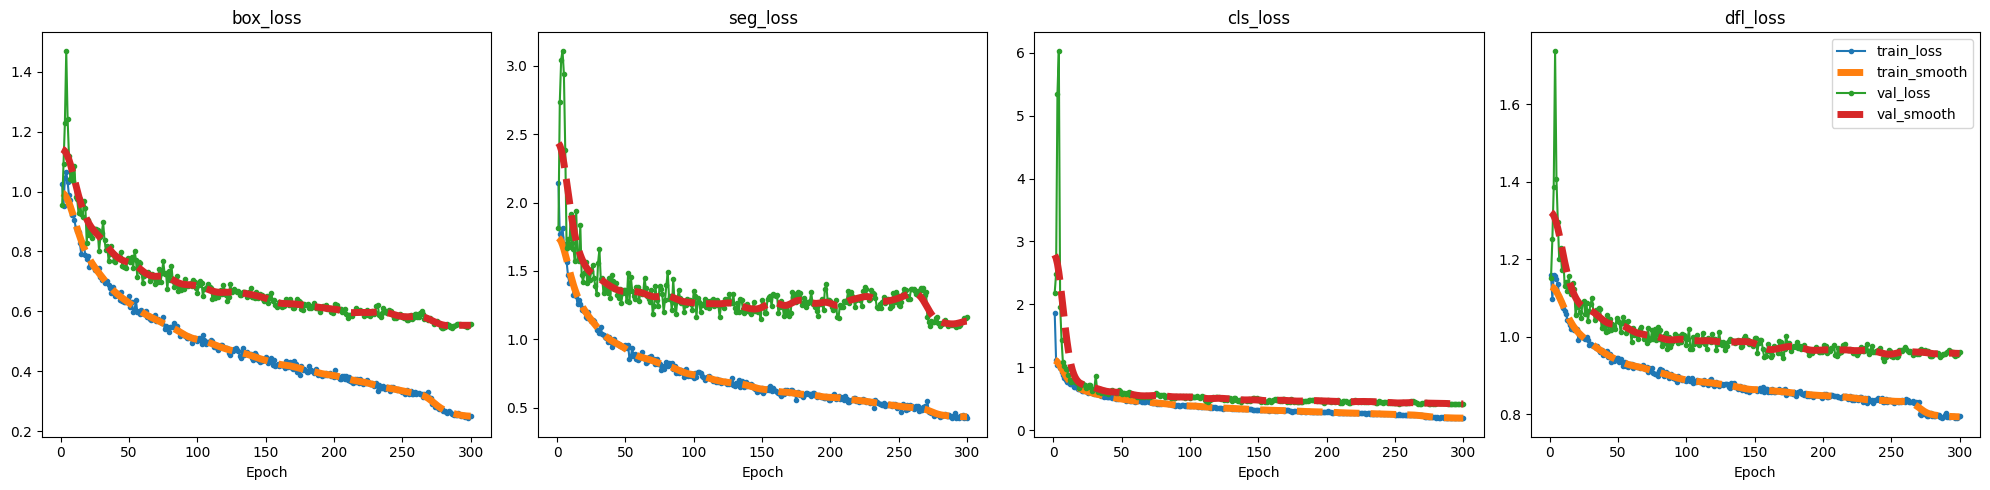

In [42]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # 两行四列的子图布局

# 对每个子图进行绘图
for i in range(4):
    row = 1
    col = i
    ax = axs[col]
    x, y = results.iloc[:,0], results.iloc[:,i+1]
    y_smooth = gaussian_filter1d(y, sigma=5)
    ax.plot(x, y, label="train_loss", marker='o', markersize=3)
    ax.plot(x, y_smooth, label="train_smooth", linestyle='--', linewidth=5)

    x, y = results.iloc[:,0], results.iloc[:,i+13]
    y_smooth = gaussian_filter1d(y, sigma=5)
    ax.plot(x, y, label="val_loss", marker='o', markersize=3)
    ax.plot(x, y_smooth, label="val_smooth", linestyle='--', linewidth=5)
    
    ax.set_title(results.columns[i+1].strip().split("/")[-1])
    ax.set_xlabel('Epoch')
ax.legend()

# 调整子图间的间隔
plt.tight_layout()
plt.show()

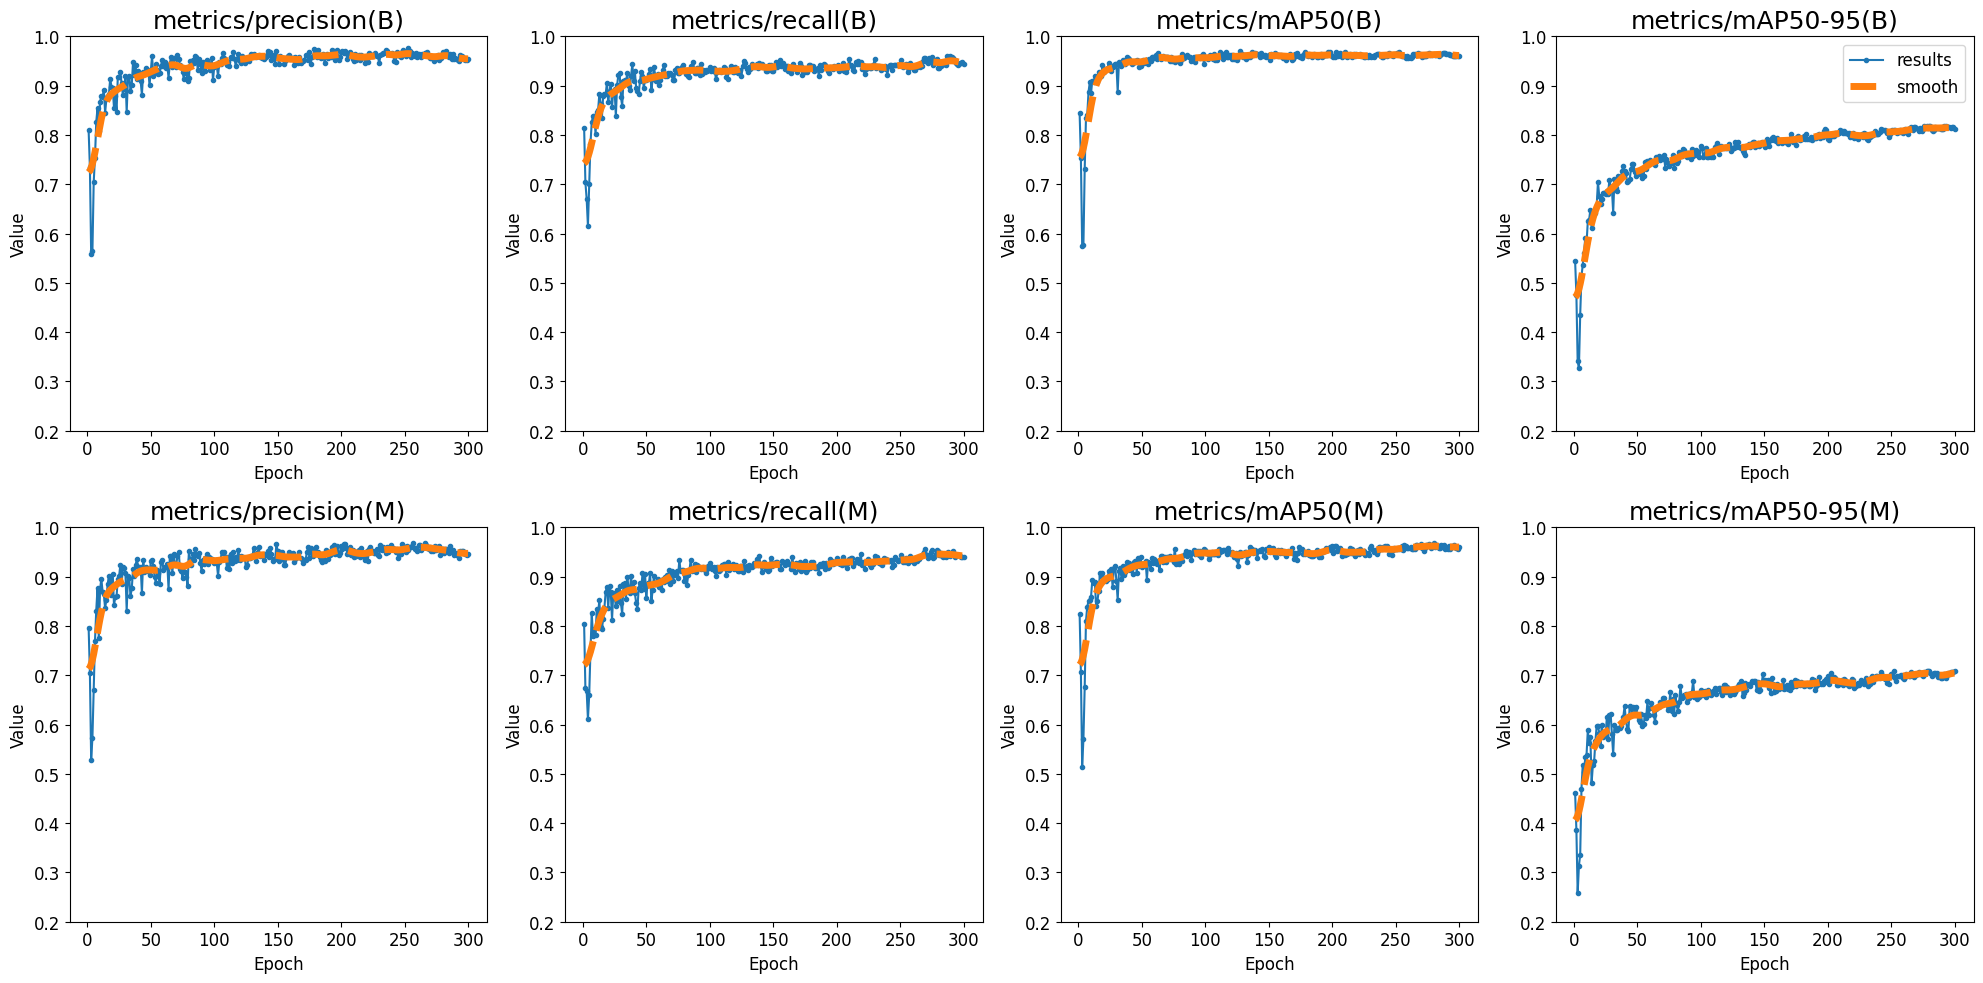

In [6]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # 两行四列的子图布局

# 设置字体大小
plt.rcParams.update({'font.size': 12})

# 对每个子图进行绘图
for i in range(8):
    row = i // 4
    col = i % 4
    ax = axs[row, col]
    x, y = results.iloc[:,0], results.iloc[:,i+5]
    y_smooth = gaussian_filter1d(y, sigma=5)
    
    ax.plot(x, y, label="results", marker='o', markersize=3)
    ax.plot(x, y_smooth, label="smooth", linestyle='--', linewidth=5)
    ax.set_title(results.columns[i+5].strip(), fontsize=18)  # 调整子图标题字体大小
    ax.set_xlabel('Epoch', fontsize=12)  # 调整X轴标签字体大小
    ax.set_ylabel('Value', fontsize=12)  # 添加Y轴标签并调整字体大小
    ax.set_ylim(0.2, 1)  # 锁定Y轴范围为0-1
    if row==0 and col==3:
        ax.legend(fontsize=12)  # 调整图例字体大小

# 调整子图间的间隔
plt.tight_layout()
plt.show()

In [1]:
import cv2
import os

def extract_frames(video_path):
    # Output directory for frames
    output_dir = r"C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_videos\train_pins_frames"
    os.makedirs(output_dir, exist_ok=True)
    
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    # Check if the video was opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        exit()
    
    # Frame rate (fps) of the video
    fps = 30
    
    # Calculate the interval between frames to save
    frame_interval = int(fps/3)
    
    frame_count = 0
    saved_count = 0
    
    while True:
        ret, frame = cap.read()
        
        if not ret:
            break
        
        # Save the frame if it's one of the required frames
        if frame_count % (frame_interval) == 0:
            frame_filename = os.path.join(output_dir, '{}_frame_{:02d}.jpg'.format(video_path.split("\\")[-1][:-4], saved_count))
            cv2.imwrite(frame_filename, frame)
            saved_count += 1
        
        frame_count += 1
    
    # Release the video capture object
    cap.release()
    
    print(f"Saved {saved_count} frames to {output_dir}")

# Path to the video files folder
base_dir = r"C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_videos\test_pins"
for video in [base_dir + "\\" + x for x in os.listdir(base_dir)]:
    extract_frames(video)

Saved 45 frames to C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_videos\train_pins_frames
Saved 43 frames to C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_videos\train_pins_frames
Saved 42 frames to C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_videos\train_pins_frames
Saved 47 frames to C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_videos\train_pins_frames
Saved 35 frames to C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_videos\train_pins_frames
Saved 37 frames to C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_videos\train_pins_frames
Saved 31 frames to C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_videos\train_pins_frames
Saved 24 frames to C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_videos\train_pins_frames
Saved 28 frames to C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_videos\train_pins_frames
Saved 21 frames to C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_videos\train_pins_frames
Saved 45 frames to C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_videos\train_pins_frames

In [70]:
a = r"C:\Users\Frank\Desktop\ucl\EDS\0034final\ALICE_videos\test_scan" + '\\20240807_171038.mp4'
a.split("\\")[-1][:-3]

'20240807_171038.'